In [39]:
import numpy as np
import re
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import make_classification
def crossCheck(cross,foldnum):
    scores=[]
    for i in range(len(cross)):

        ctrain=[]
        ctrain_y=[]
        testnum=foldnum-i-1
        testme=[]
        testme_y=[]
        
        testme=np.array(testme)
        testme_y=np.array(testme_y)
        j=0
        while j<len(cross):

            
            if j!=testnum:
                for thing in cross[j]:
                    ctrain.append(thing[0])
                    ctrain_y.append(thing[1])
               
            j+=1

# meds=[]
# with open('meds.txt') as medt:
#     meds=medt.readline().strip().split('\t')
data=pd.read_csv('diabetic_data.csv')
diag=data[['diag_1','diag_2','diag_3']]
#for thing in diag:
data=data.drop(['admission_type_id','discharge_disposition_id','admission_source_id','max_glu_serum','number_inpatient','number_emergency','number_outpatient','encounter_id','patient_nbr','weight','payer_code','A1Cresult','medical_specialty','max_glu_serum','diag_1','diag_2','diag_3'],axis=1)
data=data.drop(data[data.race=='?'].index)

data=data.drop(data[data.gender=='Unknown/Invalid'].index)
#data=data.drop(data[data.diag_3==str].index)


read=data['readmitted']
read=read.str.upper()
read=read.replace(['NO','<30','>30'],[0,1,1])

#print(read)
data=data.replace(['None','Female','No','Down'],0)
data=data.replace(['Male','Yes','Up','Steady'],1)
#data=data.replace(['[0-10)','[10-20)','[20-30)','[30-40)','[40-50)','[50-60)','[60-70)','[70-80)','[80-90)','[90-100)'],[0,1,2,3,4,5,6,7,8,9])
data=data.replace(['Down'],2)
#data=data.replace(['Other','Hispanic'],[3,4])
r=pd.get_dummies(data[['race','diabetesMed']])
change=pd.get_dummies(data['change'])
a=pd.get_dummies(data['age'])
#meddum=pd.get_dummies(data[meds])

newdata=pd.concat([data,r,a,change],axis=1)
newdata=newdata.drop(['age','race','readmitted','change','diabetesMed'],axis=1)
X=data.drop(['readmitted'],axis=1)

read=np.array(read)
x, X_test, y, y_test = train_test_split(newdata, read, test_size = 0.15, random_state = 0)
X_train,x_dev,y_train,y_dev=train_test_split(x,y,test_size=.18, random_state=0)



In [40]:
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier 


#hyperparameter grid search 
mxDepth = [5,10,15] #mxDepth 
n_ests = [10,15,20] #n_estimators
best_models = []
for n in n_ests:
    print("n_estimators =",n)
    maximized_models=[]
    for mD in mxDepth:
        results = []
        print("\tmax_depth =",mD)
        for _ in range(51):
            model = RandomForestClassifier(n_estimators=n,max_depth=mD)
            model.fit(X_train,y_train)
            pred = model.predict(x_dev)
            testy=np.array(y_dev)
            print('\t'+str(_)+" iterations",end="\r",flush=True)

            results.append((model,accuracy_score(pred,testy)))
        print('\n\tBest model score:',max(results,key=itemgetter(1))[1])
        maximized_models.append((max(results,key=itemgetter(1))[0],max(results,key=itemgetter(1))[1],mD))

    print(n,"estimators","\tbest at max_depth =",max(maximized_models,key=itemgetter(1))[2],"\nscore =",max(maximized_models,key=itemgetter(1))[1])
    print("\n")
    best_models.append((max(maximized_models,key=itemgetter(1))[0],max(maximized_models,key=itemgetter(1))[1],n))

#grid search derived best model
final_best = max(best_models,key=itemgetter(1))[0]


n_estimators = 10
	max_depth = 5
	50 iterations
	Best model score: 0.562898246075
	max_depth = 10
	50 iterations
	Best model score: 0.577678512777
	max_depth = 15
	50 iterations
	Best model score: 0.569927084018
10 estimators 	best at max_depth = 10 
score = 0.577678512777


n_estimators = 15
	max_depth = 5
	50 iterations
	Best model score: 0.560861853774
	max_depth = 10
	50 iterations
	Best model score: 0.574591079288
	max_depth = 15
	50 iterations
	Best model score: 0.570321224463
15 estimators 	best at max_depth = 10 
score = 0.574591079288


n_estimators = 20
	max_depth = 5
	50 iterations
	Best model score: 0.562569795704
	max_depth = 10
	50 iterations
	Best model score: 0.575773500624
	max_depth = 15
	50 iterations
	Best model score: 0.574065558694
20 estimators 	best at max_depth = 10 
score = 0.575773500624





final test score: 0.567877244707


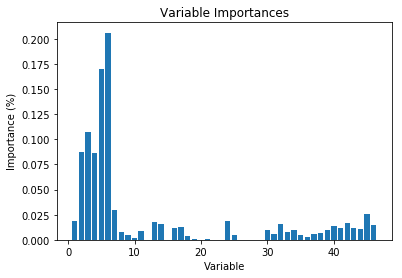

1 gender
2 time_in_hospital
3 num_lab_procedures
4 num_procedures
5 num_medications
6 number_diagnoses
7 metformin
8 repaglinide
9 nateglinide
10 chlorpropamide
11 glimepiride
12 acetohexamide
13 glipizide
14 glyburide
15 tolbutamide
16 pioglitazone
17 rosiglitazone
18 acarbose
19 miglitol
20 troglitazone
21 tolazamide
22 examide
23 citoglipton
24 insulin
25 glyburide-metformin
26 glipizide-metformin
27 glimepiride-pioglitazone
28 metformin-rosiglitazone
29 metformin-pioglitazone
30 race_AfricanAmerican
31 race_Asian
32 race_Caucasian
33 race_Hispanic
34 race_Other
35 [0-10)
36 [10-20)
37 [20-30)
38 [30-40)
39 [40-50)
40 [50-60)
41 [60-70)
42 [70-80)
43 [80-90)
44 [90-100)
45 0
46 Ch


In [44]:
import matplotlib.pyplot as plt
%matplotlib inline


#score
pred_final = final_best.predict(X_test)
print("\nfinal test score:",accuracy_score(pred_final,np.array(y_test)))


plt.bar(range(1,len(final_best.feature_importances_)+1),final_best.feature_importances_,ls="None")
plt.xlabel("Variable")
plt.ylabel("Importance (%)")
plt.title("Variable Importances")
plt.show()
for idx, column in enumerate(newdata.columns):
    print(idx+1, column)

In [46]:
trainX=np.array(test_X)
trainy=np.array(test_y)

#print(trainX)
answers=[]
for thing in trainX:
   # print(len(thing))
    #num lab, diabetes meds, time in hospital <4
    if thing[2]==1 and thing[3]>=4 and thing[4]>=40 and thing[31]=='Yes':
       # print(thing[31])
        answers.append(1)
    else:
        answers.append(0)
i=0
#trainX=list(trainX)
test=0
print(trainX)
for answer in answers:
    if answer==trainy[i]:
        test+=1
    i+=1
print(test/len(answers))

NameError: name 'test_X' is not defined